In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, glob, shutil
import mahotas as mh

In [3]:
DATAFOLDER = '/raid/mpsych/GP2LUCCHI++/Lucchi++'

In [4]:
os.listdir(DATAFOLDER)

['.DS_Store', 'Test_Out', 'Train_In', 'Test_In', 'Train_Out']

In [5]:
train_image_dir = os.path.join(DATAFOLDER, 'Train_In')
test_image_dir = os.path.join(DATAFOLDER, 'Test_In')
train_mask_dir =  os.path.join(DATAFOLDER, 'Train_Out')
test_mask_dir = os.path.join(DATAFOLDER, 'Test_Out')

In [6]:
all_image_files = sorted(sorted(glob.glob(train_image_dir+'/*.png')) + sorted(glob.glob(test_image_dir+'/*.png')))
all_mask_files = sorted(sorted(glob.glob(train_mask_dir+'/*.png')) + sorted(glob.glob(test_mask_dir+'/*.png')))

In [7]:
images = np.zeros((660, 512, 512), dtype=np.uint8)

In [8]:
counter = 0
for a in all_image_files:
    img = mh.imread(a)
    
    # grab left image
    left = img[0:512,0:512]
    right = img[0:512,512:]
    
    images[counter] = left
    images[counter+1] = right
    
    counter += 2

In [9]:
masks = np.zeros((660, 512, 512), dtype=np.bool)

In [10]:
counter = 0
for a in all_mask_files:
    img = mh.imread(a)
    if img.ndim == 3:
        # grab left image
        left = img[0:512,0:512,0]
        right = img[0:512,512:,0]
    elif img.ndim == 2:
        left = img[0:512,0:512]
        right = img[0:512,512:]
    
    masks[counter] = left.astype(np.bool)
    masks[counter+1] = right.astype(np.bool)
    
    counter += 2

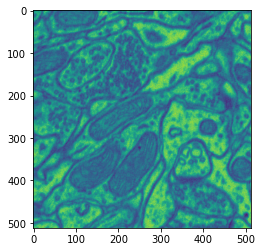

In [11]:
imshow(images[0])

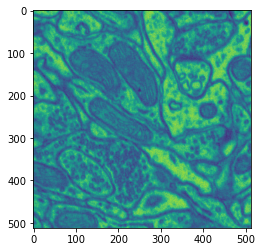

In [12]:
imshow(np.flipud(images[0]))  # flip upside down

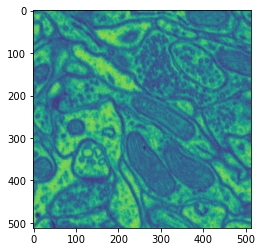

In [13]:
imshow(np.fliplr(images[0]))  # flip leftside right

In [14]:
#adding upside down flipped and leftside right flipped images for data augmentation
augmented_images = np.concatenate((np.fliplr(images), np.flipud(images), images), axis=0)  #trying to keep the original images only for Z dataset

In [15]:
augmented_masks = np.concatenate((np.fliplr(masks), np.flipud(masks), masks), axis=0)

In [16]:
augmented_images2 = np.expand_dims(augmented_images, axis=-1)
augmented_masks2 = np.expand_dims(augmented_masks, axis=-1)

In [17]:
augmented_masks2.shape

(1980, 512, 512, 1)

In [18]:
np.save('/raid/mpsych/gp2_lucchi_augmented_images.npy', augmented_images2)

In [19]:
np.save('/raid/mpsych/gp2_lucchi_augmented_masks.npy', augmented_masks2)

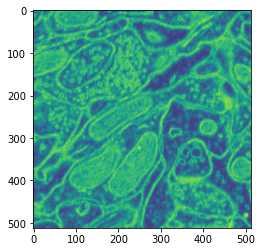

In [20]:
imshow(255-images[0])  # invert colors of image

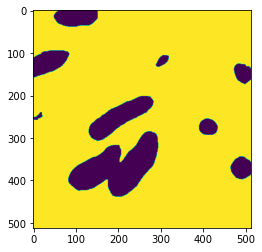

In [21]:
imshow(255-masks[0])

In [22]:
#Adding inverted images for data augmentation along with both kinds of flipped images
fliplr_images = np.fliplr(images)
flipud_images = np.flipud(images)
inverted_images = 255-images
fliplr_masks = np.fliplr(masks)
flipud_masks = np.flipud(masks)
inverted_masks = 255-masks
augmented_masks_plus = np.concatenate((inverted_masks, fliplr_masks[:100], flipud_masks[:100], masks[:100] , fliplr_masks[100:], masks[100:], flipud_masks[100:]), axis=0)

In [23]:
augmented_images_plus = np.concatenate((inverted_images, fliplr_images[:100], flipud_images[:100], images[:100] , fliplr_images[100:], images[100:], flipud_images[100:]), axis=0)

In [24]:
augmented_images_plus2 = np.expand_dims(augmented_images_plus, axis=-1)
augmented_masks_plus2 = np.expand_dims(augmented_masks_plus, axis=-1)

In [25]:
augmented_masks_plus2.shape

(2640, 512, 512, 1)

In [26]:
np.save('/raid/mpsych/gp2_lucchi_augmented_masks_plus.npy', augmented_masks_plus2)

In [27]:
np.save('/raid/mpsych/gp2_lucchi_augmented_images_plus.npy', augmented_images_plus2)

In [28]:
#Adding rotated images for data augmentation along with both kinds of flipped images

In [29]:
rotated_images = np.rot90(images,axes=(-2,-1))  # images rotated with 90 degrees

In [30]:
rotated_images.shape


(660, 512, 512)

In [31]:
rotated_masks = np.rot90(masks,axes=(-2,-1))

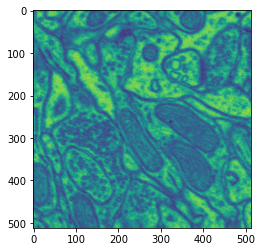

In [32]:
imshow(rotated_images[0])

In [33]:
augmented_images_flip_rotate = np.concatenate((rotated_images[:200], fliplr_images[:200], flipud_images[:200], images[:200] , fliplr_images[200:], images[200:], rotated_images[200:], flipud_images[200:]), axis=0)
augmented_masks_flip_rotate = np.concatenate((rotated_masks[:200], fliplr_masks[:200], flipud_masks[:200], masks[:200] , fliplr_masks[200:], masks[200:], rotated_masks[200:], flipud_masks[200:]), axis=0)


In [34]:
augmented_images_flip_rotate.shape

(2640, 512, 512)

In [35]:
augmented_images_flip_rotate2 = np.expand_dims(augmented_images_flip_rotate, axis=-1)
augmented_masks_flip_rotate2 = np.expand_dims(augmented_masks_flip_rotate, axis=-1)

In [36]:
np.save('/raid/mpsych/augmented_masks_flip_rotate.npy', augmented_masks_flip_rotate2)
np.save('/raid/mpsych/augmented_images_flip_rotate.npy', augmented_images_flip_rotate2)